### Linear discriminant analysis.

In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
import scipy.linalg as la

In [3]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

plt.style.use('fivethirtyeight')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8

colors = ['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c', 
'#137e6d', '#be0119', '#3b638c', '#af6f09', '#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', 
'#810f7c', '#137e6d', '#be0119', '#3b638c', '#af6f09']

cmap = mcolors.LinearSegmentedColormap.from_list("", ["#82cafc", "#069af3", "#0485d1", colors[0], colors[8]])

Leggiamo i dati da un file csv in un dataframe pandas. I dati hanno 3 valori: i primi due corrispondono alle features e sono assegnati alle colonne x1 e x2 del dataframe; il terzo è il valore target, assegnato alla colonna t. Vengono poi creati una matrice X delle features e un vettore target t

In [6]:
# legge i dati in dataframe pandas
data = pd.read_csv("../../data/ex2data1.txt", header=0, delimiter=',', names=['x1','x2','t'])

# calcola dimensione dei dati
n = len(data)
n0 = len(data[data.t==0])

# calcola dimensionalità delle features
nfeatures = len(data.columns)-1

X = np.array(data[['x1','x2']])
t = np.array(data['t'])


Visualizza il dataset.

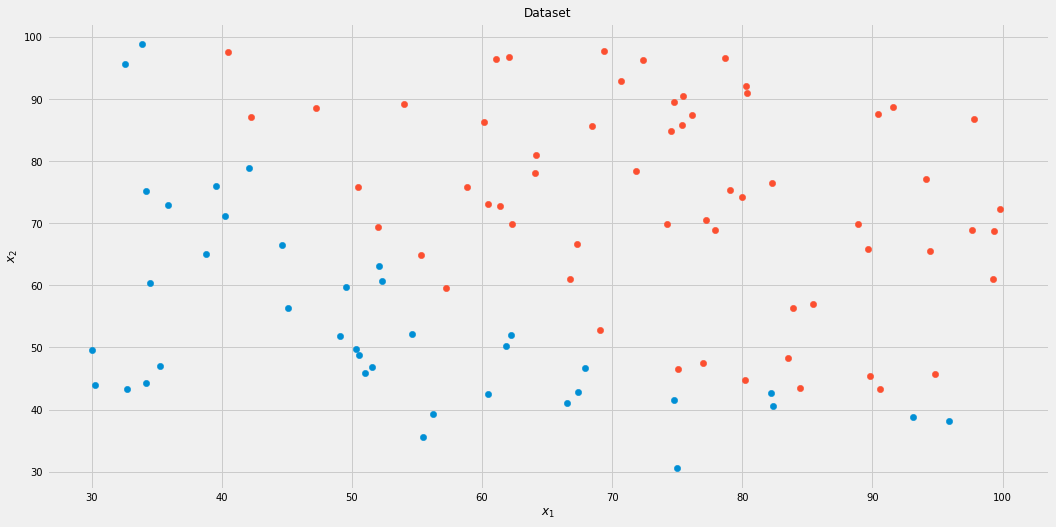

In [10]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
ax.scatter(data[data.t==0].x1, data[data.t==0].x2, s=40, c=colors[0])
ax.scatter(data[data.t==1].x1, data[data.t==1].x2, s=40,c=colors[1])
plt.xlabel('$x_1$', fontsize=12)
plt.ylabel('$x_2$', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Dataset', fontsize=12)
plt.show()

Calcola il punto medio del dataset

In [14]:
mu = X.mean(axis=0)
mu

array([65.9576136 , 66.10277895])

Calcola la matrice di covarianza del dataset

In [13]:
C = np.cov(X.T)
C

array([[372.56755605,  -4.87041772],
       [ -4.87041772, 347.4076736 ]])

Calcola la matrice di covarianza media delle classi a partire dalle matrici di covarianza delle varie classi

In [17]:
Sw = np.zeros((nfeatures,nfeatures))
# determina numero di classi nel problema
classes = np.unique(t)
for i in range(len(classes)):
    # determina gli indici degli elementi nella classe
    indices = np.squeeze(np.where(np.squeeze(t.T)==classes[i]))
    # calcola la matrice di covarianza della classe
    classcov = np.cov(X[indices,:].T)
    print(classcov)
    # la aggiunge alla matrice di covarianza media delle classi
    Sw += float(len(indices))/n * classcov
print('\n')
print(Sw)

[[ 307.89381856 -163.26673799]
 [-163.26673799  250.63891273]]
[[222.3802562  -80.5619594 ]
 [-80.5619594  256.39706463]]


[[ 256.06741713 -113.14262975]
 [-113.14262975  254.12870176]]


Calcola la matrice di covarianza tra le classi Sb come differenza tra covarianza totale e covarianza intra classe

In [18]:
Sb = C - Sw
Sb

array([[116.50013892, 108.27221203],
       [108.27221203,  93.27897184]])

Calcola la matrice di proiezione degli elementi del dataset

In [25]:
# calcola la matrice di cui determinare autovalori e autovettori
S = np.matrix(Sb).I*np.matrix(Sw)
print(S)
# determina autovalori e autovettori
# gli autovettori sono le colonne di evecs
evals,evecs = la.eig(S)
# ordina autovalori e autovettori in ordine decrescente rispetto agli autovalori
# in indices la sequenza degli indici degli autovalori in evals, considerati in ordine crescente
indices = np.argsort(evals)
# indices viene invertito, in modo da fornire gli indici degli autovalori in ordine decrescente
indices = indices[::-1]
# gli autovettori (colonne di evecs) vengono ordianti secondo gli indici di indices
evecs = evecs[:,indices]
# lo stesso per gli autovalori
evals = evals[indices]
print('\n')
print(evals)
print(evecs)
# fissiamo il numero di dimensioni su cui proiettare il dataset
dim = 1
# seleziona le prime dim colonne di evecs, e quindi i primi dim autovettori, ottenendo la
# matrice di proiezione
theta = evecs[:,:dim]
print('\n')
print(theta)

[[-42.2218146   44.48036104]
 [ 47.79540924 -48.90553883]]


[  0.66537369+0.j -91.79272712+0.j]
[[ 0.7198814  -0.66785689]
 [ 0.69409709  0.74428972]]


[[0.7198814 ]
 [0.69409709]]


Proietta gli elementi nel nuovo spazio

In [99]:
proiez = np.dot(X,theta)

Definiamo la griglia 100x100 da utilizzare per la visualizzazione delle varie distribuzioni.

In [27]:
# insieme delle ascisse dei punti
u = np.linspace(min(X[:,0]), max(X[:,0]), 100)
# insieme delle ordinate dei punti
v = np.linspace(min(X[:,1]), max(X[:,1]), 100)
# deriva i punti della griglia: il punto in posizione i,j nella griglia ha ascissa U(i,j) e ordinata V(i,j)
U, V = np.meshgrid(u, v)

Calcola per tutti i punti della griglia la coordinata della relativa proiezione sulla retta ($0$ corrisponde alla proiezione del punto medio)

In [58]:
# 
vf=np.vectorize(lambda x,y:np.dot(theta.T, np.array([x,y])-mu))

# 
z=vf(U,V)

Visualizzazione dei valori delle proiezioni sul sottospazio (retta) individuato

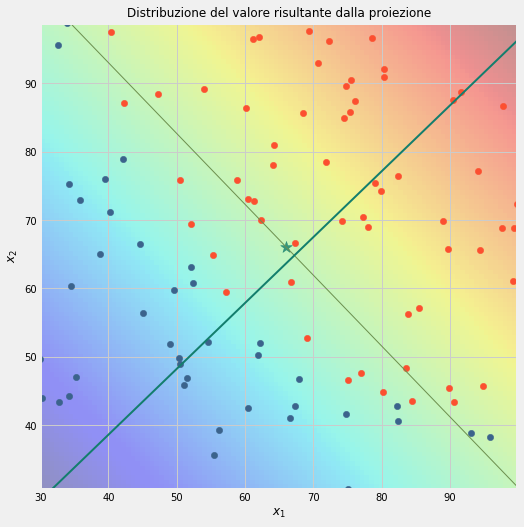

In [59]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
imshow_handle = plt.imshow(z, origin='lower', extent=(min(X[:,0]), max(X[:,0]), min(X[:,1]), max(X[:,1])), alpha=.4)
# rappresenta i punti del dataset
ax.scatter(data[data.t==0].x1, data[data.t==0].x2, s=40, c=colors[8])
ax.scatter(data[data.t==1].x1, data[data.t==1].x2, s=40,c=colors[1])
# rappresenta la media della distribuzione
plt.plot(u,u*theta[1]/theta[0], color=colors[6])
plt.contour(U, V, z, [0.0], colors=[colors[3]], linewidths=[1])
ax.scatter(mu[0], mu[1], s=150,c=colors[6], marker='*', alpha=.8)
# inserisce titoli, etc.
plt.xlabel('$x_1$', fontsize=12)
plt.ylabel('$x_2$', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(u.min(), u.max())
plt.ylim(v.min(), v.max())
plt.title('Distribuzione del valore risultante dalla proiezione', fontsize=12)
plt.show()

Proviamo a utilizzare la proiezione del punto medio come separazione tra le due classi proiettate.

In [63]:
# proiezione del punto medio
proiez_m = np.dot(mu,theta)

Effettuiamo le predizioni sugli elementi del dataset.

In [64]:
# predizioni del modello
pred = np.where(proiez-proiez_m<0, 0, 1).flatten()

Valutiamo l'accuracy

In [65]:
# numero elementi mal classificati
nmc = abs(pred-t).sum()
# accuracy
acc = 1-float(nmc)/n
acc

0.8686868686868687

Proviamo a utilizzare come valore di separazione quello per il quale i valori delle due distribuzioni sono uguali. Per far ciò, deriviamo empiricamente le distribuzioni delle proiezioni delle due classi

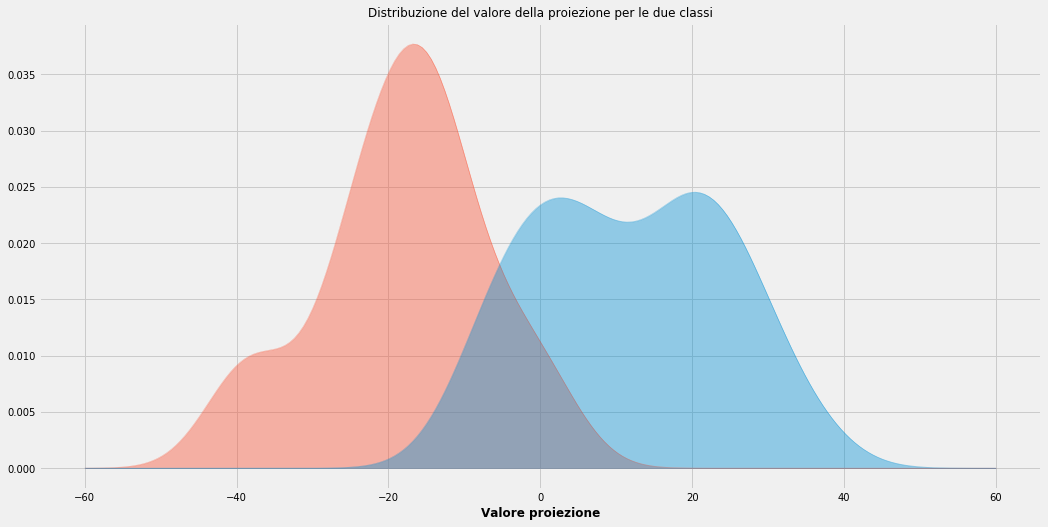

In [66]:
x1=np.linspace(-60,60,201)
y1=st.gaussian_kde((np.dot(X[t==0,:],theta)-np.dot(mu,theta)).flatten())(x1)
y2=st.gaussian_kde((np.dot(X[t==1,:],theta)-np.dot(mu,theta)).flatten())(x1)
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
ax.plot(x1, y1, color= colors[1], alpha=.4, lw=.5)
ax.plot(x1, y2, color= colors[0], alpha=.4, lw=.5)
ax.fill_between(x1, y1, color=colors[1], alpha=.4)
ax.fill_between(x1, y2, color=colors[0], alpha=.4)
plt.xlabel('Valore proiezione', fontsize=12)
plt.ylabel('', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Distribuzione del valore della proiezione per le due classi', fontsize=12)
plt.show()

Individuiamo il nuovo valore valore di separazione, per il quale i valori delle due distribuzioni sono uguali

In [67]:
# indice per il quale la differenza tra i valori delle due distribuzioni cambia di segno
ind0=np.nonzero((np.diff(np.sign(y1-y2)) != 0)*1)
m0=x1[ind0]
m0

array([-5.4])

Visualizza la nuova situazione

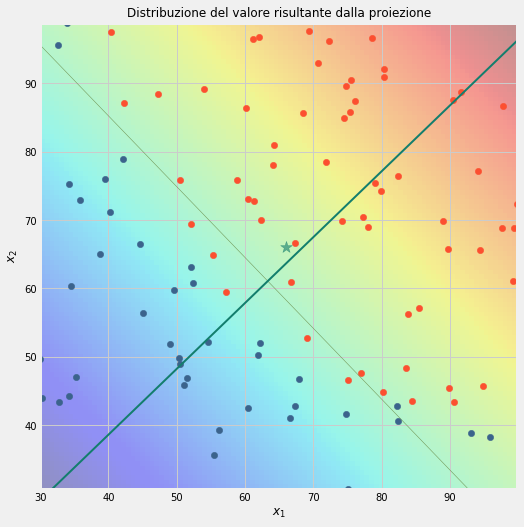

In [70]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
imshow_handle = plt.imshow(z-m0[0], origin='lower', extent=(min(X[:,0]), max(X[:,0]), min(X[:,1]), max(X[:,1])), alpha=.4)
# rappresenta i punti del dataset
ax.scatter(data[data.t==0].x1, data[data.t==0].x2, s=40, c=colors[8])
ax.scatter(data[data.t==1].x1, data[data.t==1].x2, s=40, c=colors[1])
# rappresenta la media della distribuzione
ax.scatter(mu[0], mu[1], s=150,c=colors[6], marker='*', alpha=.6)
plt.plot(u,u*theta[1]/theta[0], color=colors[6])
plt.contour(U, V, z-m0[0], [0.0], colors=[colors[3]], linewidths=[.5])
# inserisce titoli, etc.
plt.xlabel('$x_1$', fontsize=12)
plt.ylabel('$x_2$', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(u.min(), u.max())
plt.ylim(v.min(), v.max())
plt.title('Distribuzione del valore risultante dalla proiezione', fontsize=12)
plt.show()

Valuta il metodo considerando il nuovo iperpiano di separazione

In [57]:
pred = np.where(proiez-proiez_m-m0<0, 0, 1).flatten()
nmc0=abs(pred-t).sum()
acc = 1-float(nmc0)/n
print('Accuracy: {0:5.3f}'.format(acc))

Accuracy: 0.899


In [91]:
fp = np.where(pred-t==1, 1, 0).sum()
print('False positives: {0:d}'.format(fp))

False positives: 2


In [92]:
fn = np.where(pred-t==-1, 1, 0).sum()
print('False negatives: {0:d}'.format(fn))

False negatives: 11


In [93]:
tp = np.where(pred+t==2, 1, 0).sum()
print('True positives: {0:d}'.format(tp))

True positives: 49


In [94]:
tn = np.where(pred+t==0, 1, 0).sum()
print('True negatives: {0:d}'.format(tn))

True negatives: 37


In [96]:
precision = float(tp)/(tp+fp)
print('Precision: {0:.3f}'.format(precision))

Precision: 0.961


In [98]:
recall = float(tp)/(tp+fn)
print('Precision: {0:.3f}'.format(recall))

Precision: 0.817
